In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load Data
print("Loading data...")
train_data = np.load("../data/processed/training_data.npz")
test_data = np.load("../data/processed/testing_data.npz")

X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Loading data...
Training samples: 5712, Testing samples: 1311


In [3]:
# Reshape Data for CNN
X_train = X_train.reshape((-1, 128, 128, 3))
X_test = X_test.reshape((-1, 128, 128, 3))
input_shape = X_train.shape[1:]

In [4]:
# Split Training Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Build Model
def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(np.unique(y_train))
model = build_model(input_shape, num_classes)
model.summary()

c:\Users\HP\Desktop\brain-tumor-classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath="../models/best_model.keras", save_best_only=True, monitor='val_loss')
]

In [9]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.4575 - loss: 1.1561 - val_accuracy: 0.7708 - val_loss: 0.5980
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.7723 - loss: 0.5818 - val_accuracy: 0.7498 - val_loss: 0.5375
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 231ms/step - accuracy: 0.8223 - loss: 0.4621 - val_accuracy: 0.8731 - val_loss: 0.3354
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 37s 259ms/step - accuracy: 0.8645 - loss: 0.3671 - val_accuracy: 0.9055 - val_loss: 0.2613
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.8862 - loss: 0.3080 - val_accuracy: 0.8933 - val_loss: 0.2523
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 32s 223ms/step - accuracy: 0.8981 - loss: 0.2641 - val_accuracy: 0.9081 - val_loss: 0.2051
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 217ms/step - accuracy: 0.9200 - loss: 0.2172 - val_accuracy: 0.9213 - val_loss: 0.2077
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.9194 - loss: 0

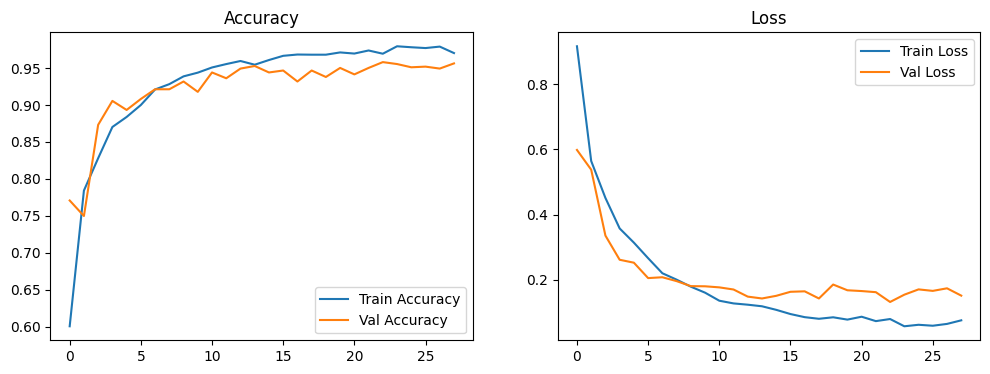

In [10]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [11]:
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

41/41 - 2s - 53ms/step - accuracy: 0.9603 - loss: 0.1245
Test Accuracy: 0.9603, Test Loss: 0.1245


In [13]:
# Save Final Model
final_model_path = "../models/final_model.keras"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}.")

Final model saved to ../models/final_model.keras.
